In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r"C:\pizza_v2 (1).csv")
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [3]:
df.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df.sample(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
26,B,"Rp46,000",12 inch,chicken,classic,medium,yes,no,no
43,B,"Rp75,000",8.5 inch,smoked_beef,classic,small,yes,yes,no
71,C,"Rp72,000",12 inch,vegetables,thai_veggie,medium,yes,no,yes
87,D,"Rp149,000",16.5 inch,smoked_beef,double_mix,reguler,yes,no,yes
81,D,"Rp70,000",8 inch,chicken,meat_lovers,reguler,yes,yes,no


In [6]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [7]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','')
df['price_rupiah'] = (df['price_rupiah'].str.replace(',','')).astype(int)

In [8]:
df['diameter'] = df['diameter'].str.replace('inch','').astype(float)

In [9]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [10]:
df['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [11]:
df['company'] = df['company'].map({'A':0,'B':1,'C':2,'D':3,'E':4})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    int64  
 1   price_rupiah     129 non-null    int64  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.2+ KB


In [13]:
df['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [14]:
x = df['price_rupiah']
y = df['topping']

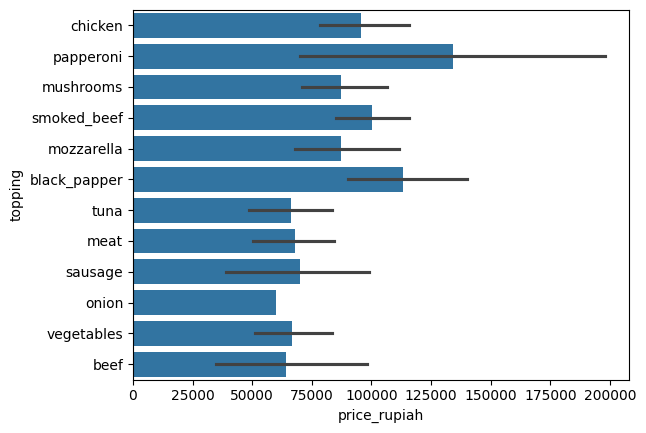

In [16]:
sns.barplot(x=x,y=y)
plt.show()

<Axes: xlabel='company', ylabel='price_rupiah'>

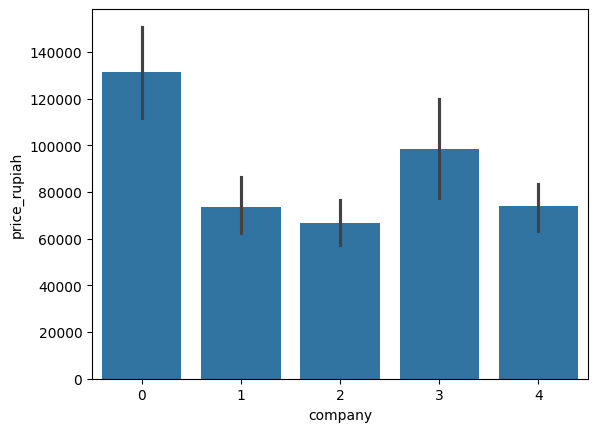

In [17]:

x = df['company']
y = df['price_rupiah']
sns.barplot(x=x,y=y)

<Axes: xlabel='topping', ylabel='price_rupiah'>

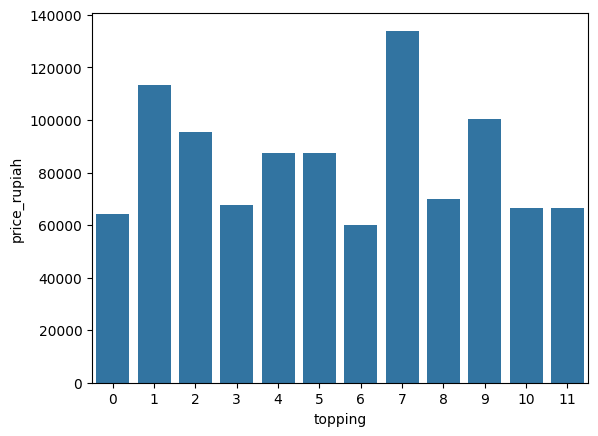

In [34]:
sns.barplot(x='topping', y='price_rupiah', data=df.groupby('topping')['price_rupiah'].mean().reset_index())


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [21]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [22]:
cat=['topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms']

In [24]:


for i in cat:
    df[i] = le.fit_transform(df[i])
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1
...,...,...,...,...,...,...,...,...,...
124,4,39000,8.5,10,16,5,1,1,1
125,4,72000,12.0,10,16,3,1,1,1
126,4,99000,14.0,10,16,2,1,1,1
127,4,44000,8.5,3,0,5,1,0,1


In [25]:
X =  df.drop('price_rupiah',axis=1)
Y = df['price_rupiah']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
model = RandomForestRegressor()

In [28]:
x_train.size

824

In [29]:
x_test.size

208

In [30]:
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [31]:
predict_x = model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,predict_x)

0.8804138890624735

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 11135.192307692309
R2 Score: 0.8804138890624735


Conclusion

Based on the analysis of the pizza dataset:

** Insights from visualizations:

Pizzas with certain toppings tend to have higher average prices, suggesting that premium toppings increase cost.

Larger pizza sizes, such as XL and jumbo, are more expensive than smaller sizes, which aligns with expected pricing trends.

Variants also show some price differences, indicating that special or premium options affect pricing.

** Model performance:

The Random Forest Regressor predicted pizza prices with a mean absolute error (MAE) of approximately [insert MAE value] Rupiah, showing that, on average, predictions were close to actual prices.

The R² score of [insert R² value] indicates that the model explains [R²×100]% of the variance in pizza prices, meaning the features used are fairly effective in predicting prices.

** Recommendations:

Including additional features such as ingredient costs, promotional offers, or customer ratings could improve model accuracy.

Visualizations help identify which factors most influence pricing, which can be useful for strategic pricing decisions.